In [1]:
%matplotlib inline

# Dégagement d'un gardien de but.

Une des forces de la mécanique newtonienne est son caractère prédictif. Une des plus belles prédictions est le retour de la comète de Halley.
Peut-on prédire la trajectoire d'un dégagement de gardien de but?

![img_steve_mandanda.jpg](img_steve_mandanda.jpg "Steve Mandanda")

## Contexte

On considère une balle de foot placée dans la surface de but dégagé par un gardien de but. 
On choisit un repère cartésien $(O ; \vec{e}_x,\vec{e}_y)$ centré sur la position initale de la balle.
Le gardien de but lui communique une vitesse intiale $\vec{v}_0 = v_0 \cos \theta\, \vec{e}_x + v_0 \cos \theta\, \vec{e}_y$


Typiquement, la balle part avec une vitesse comprise entre $25$ et $35\,m\cdot s^{-1}$ et est tiré avec un angle $\theta$ compris entre 35° et 50°. La balle retombe souvent aux alentours du rond central.


<img src="terrain_balle.png">


## Etude de la trajectoire

* Sytème: balle de football de masse $m=0.450\, kg$
* Bilans des forces:
  * le poids: $\vec{P}=m\vec{g}$
  * les forces de frottement de l'air qu'on considère négligeable
* Référentiel: On étudie le mouvement dans le référentiel terrestre qu'on suppose galiléen.

Ci-dessous un schéma:

Dans le référentiel terrestre, supposé galiléen, on applique le principe fondamental de la dynamique:
     \begin{eqnarray}
    m\vec{a} & = &\sum_i \vec{F}_i = m\vec{g} \\
     \vec{a} & = & \vec{g}
     \end{eqnarray}
    En projetant dans le repère choisi, on obtient:
    \begin{equation}
    a_x= 0 \quad \quad a_y= -g
    \end{equation}
  

En tenant compte des conditions initiales (vitesse initiale $\vec{v}_0$ et balle initialement en $O$) on trouve:
$$\vec{v}(t)=\begin{cases} v_{0}\cos\theta\\ -gt+v_{0}\sin\theta \end{cases} \qquad \vec{OM}(t)=\begin{cases} v_{0}\cos\theta\cdot t\\  -\frac{gt^{2}}{2}+v_{0}\sin\theta\cdot t\end{cases}$$

Par substitution, on en déduit l'expression de la trajectoire:
$$ y= -\frac{g}{2\left( v_0 \cos \theta\right)^2}x^2+\tan\theta \cdot x$$

On peut également calculer l'énergie cinétque, l'énergie potentielle et mécanique de la balle au cours du mouvement.
Les graphiques suivants ont été calculés pour une vitesse initiale de $v_0=30\,m\cdot s^{-1}$ et un angle de tir de $\theta=35°$.


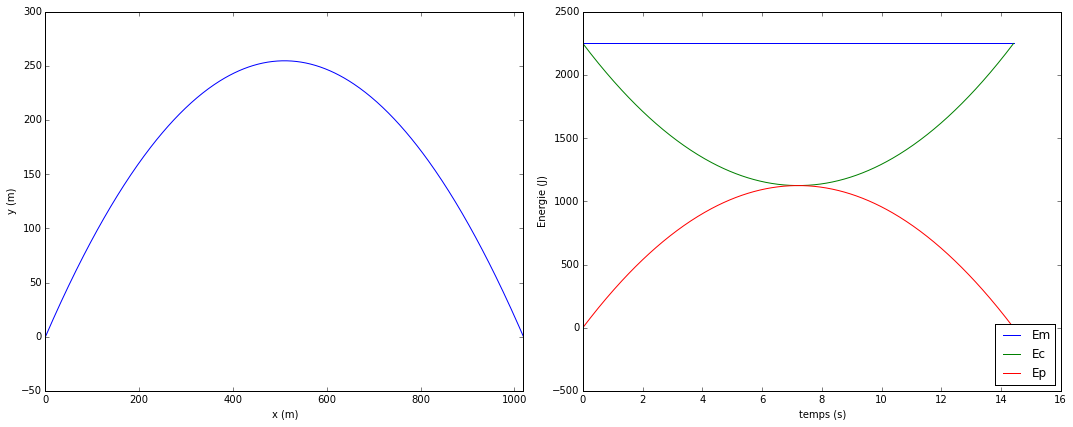

In [3]:
import numpy as np
import matplotlib.pyplot as plt

####parametre du système
g=9.81 #m.s^-2
m=0.450 #kg

#position initiale
x0=0 
y0=0
#vitesse initiale
v0= 100 #norme de la vitesse initiale
theta= 45*np.pi/180. #angle inital
vx0=v0*np.cos(theta)
vy0=v0*np.sin(theta)


#### distance et temps du tir
xmax=x0+v0**2/g*np.sin(2*theta)
tmax=xmax/vx0

X=np.linspace(x0,xmax,500)
t=np.linspace(0,tmax,500)

#### equation horaire de la vitesse et de la position
def v(t):
    vx=np.array([v0*np.cos(theta)]*len(t))
    vy=-g*t+v0*np.sin(theta)
    v=np.sqrt(vx**2+vy**2)
    return [vx,vy,v]
def pos(t):
    OMx=v0*np.cos(theta)*t+x0
    OMy=-0.5*g*t**2+v0*np.sin(theta)*t+y0
    return OMx,OMy


#### Affichage des courbes
plt.figure(figsize=(15,6))
#trajectoire
plt.subplot(121)
plt.plot(X,y0-g/2/(vx0)**2*(X-x0)**2+np.tan(theta)*(X-x0),'b-')
plt.xlim(x0,xmax)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# énergie 
plt.subplot(122)
plt.plot(t,0.5*m*v(t)[2]**2+m*g*pos(t)[1],label='Em')
plt.plot(t,0.5*m*v(t)[2]**2,label='Ec')
plt.plot(t,m*g*pos(t)[1],label="Ep")
##plt.plot(t,v(t)[0],label='VX')
##plt.plot(t,v(t)[1],label='VY')
##plt.plot(t,v(t)[2],label='V')
#plt.ylim(0,0.5*m*v0**2*1.1)
plt.legend(loc='lower right')
plt.xlabel('temps (s)')
plt.ylabel('Energie (J)')
plt.tight_layout()
plt.show()



 **<span style="color:blue">Question:</span>** La prédiction du modèle utilisé est elle réaliste? Pourquoi?
 
 
 Nous avons, jusqu'à présent, négligé les frottements de l'air. Ici, l'effet sur la trajectoire n'est pas négligeable.
 Le programme suivant permet de prendre en compte les frottements de l'air. Cela revient à considérer une force supplémentaire dirigée dans le sens opposé à la vitesse et de norme:
 $$F=-kv^2 $$
 La constante $k$ dépend, entre autres, de la forme de l'objet. Pour une balle de foot, cette constante vaut environ $10^{-2}\,kg\cdot m$.
 

(0.01, 0.45)


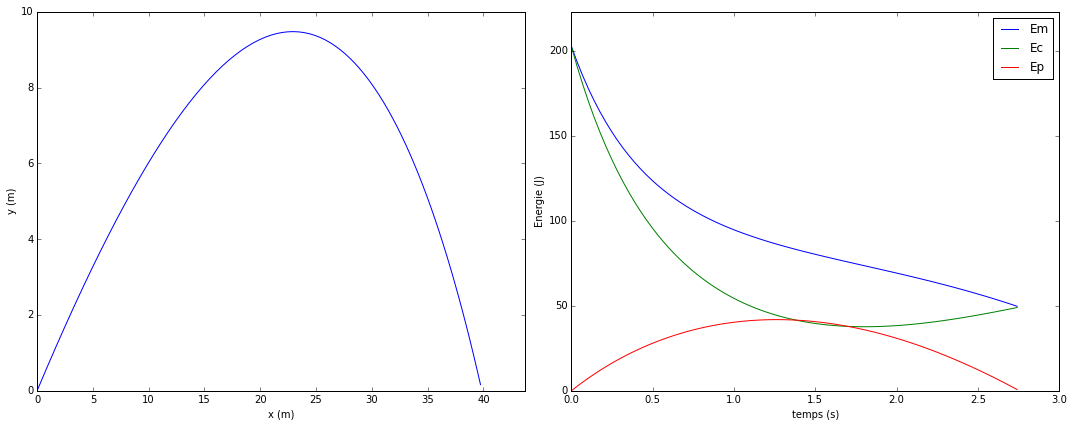

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

####parametre du système
g=9.81 #m.s^-2
m=0.450 #kg
k=1e-2 #0.5*Cx*rho_air*S
Nech=500

#position initiale
x0=0 
y0=0
#vitesse initiale
v0= 30 #norme de la vitesse initiale (m.s^-1)
theta= 35*np.pi/180. #angle inital
vx0=v0*np.cos(theta)
vy0=v0*np.sin(theta)


#### distance et temps du tir (sans frottements)
xmax=x0+v0**2/g*np.sin(2*theta)
tmax=5*xmax/vx0

t=np.linspace(0,tmax,Nech)

#### equation différentielle
def f(z,t,k,m):
    (x,y,dx,dy)=z
    ax=-k/m*dx*np.sqrt(dx**2+dy**2)
    ay=-g-k/m*dy*np.sqrt(dx**2+dy**2)
    return (dx,dy,ax,ay)

init=(x0,y0,vx0,vy0)
param=(k,m)
print(param)
z = odeint(f,init,t,args=param)
#on se limite au valeur d'indice pour lesquels y>=0
for i in range(int(Nech)):
    if z[i,1]<0:
        z=z[:i,:]
        break
X = z[:,0]
Y = z[:,1]
VX = z[:,2]
VY = z[:,3]

# calcul de l'énergie
def energie(X,Y,VX,VY,t,m):
    Ec=0.5*m*(VX**2+VY**2)
    Ep=m*g*Y
    Em=Ec+Ep
    return Ec, Ep, Em

#### Affichage des courbes
plt.figure(figsize=(15,6))
#trajectoire
plt.subplot(121)
plt.plot(X,Y,'b-')
plt.xlim(x0,1.1*X[-1])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# énergie
t=t[:len(X)]
Ec, Ep, Em = energie(X,Y,VX,VY,t,m)
plt.subplot(122)
##plt.plot(t,VX,label='VX')
##plt.plot(t,VY,label='VY')
##plt.plot(t,np.sqrt(VX**2+VY**2),label='V')
plt.plot(t,Em,label='Em')
plt.plot(t,Ec,label='Ec')
plt.plot(t,Ep,label="Ep")
plt.ylim(0,0.5*m*v0**2*1.1)
plt.legend(loc=1)
plt.xlabel('temps (s)')
plt.ylabel('Energie (J)')
plt.tight_layout()
plt.show()


**<span style="color:blue">Question:</span>** Ce modèle permet-il de mieux décrire la trajectoire réelle de la balle?



**<span style="color:blue">Question:</span>**  Quel est l'effet des forces de frottements sur l'énergie? A-t-on le même comportement pour le poids?